In [46]:
#  Anubhav gupta 
# note X=m*(n+1),x=m*(n)
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib import style
import seaborn as sb        # for cool visulize

In [47]:
df=pd.read_csv('ex2data1.txt',names=['Subject 1','Subject 2','Admission'])

In [48]:
df.head(10)
# subject1,subject2=x, admission= y   (note make always x,t np array for easy manipulation)
x=df.iloc[:,0:2].values  # iloc(x,slice of y)
y=df.iloc[:,2].values
# x

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


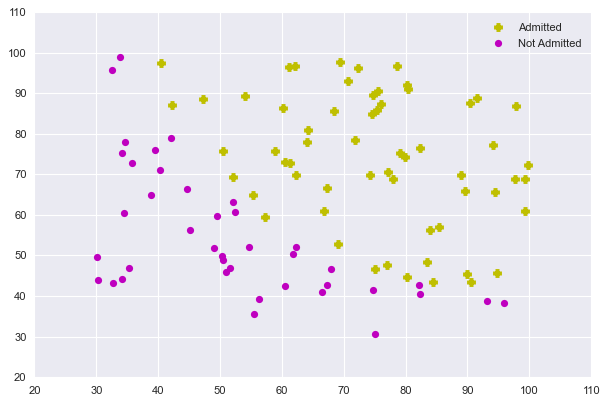

In [49]:
#  admission yellow

pos_one= (y==1).reshape((100,1))   # pos_one becomes true where y==1
pos_zero=(y==0).reshape((100,1))
m=len(y)
# pos_zero=
# print(pos_one)

print(style.available)
style.use('seaborn')
plt.scatter(x[pos_one[:,0],0],x[pos_one[:,0],1],color='y',marker='+',linewidth=8)
plt.scatter(x[pos_zero[:,0],0],x[pos_zero[:,0],1],color='m',marker='o',linewidth=2)
plt.legend(["Admitted","Not Admitted"])
# sb.scatterplot(x[pos_one[:,0],0],x[pos_one[:,0],1])
# sb.scatterplot(data=df, x="Subject 1", y="Subject 2")
plt.show()

In [50]:
def sigmod(value):
    return 1/(1+np.exp(-value))
    


In [51]:
def cost_funtion(X,theta,y,m): #(m*3,3*1,m*1) n+1=3
    
#     print(X.shape,theta.shape)
    sig=sigmod(np.dot(X,theta))
#     print(sig.shape)
    return float((-1/m)*(np.transpose(y).dot(np.log(sig))   +    np.transpose(1-y).dot(np.log(1-sig))))   # first write and solve in note


In [52]:
def feature_scaling(X):
    
    #
    #     x=(x-mean)/standard_deviation  mean--> coloumwise
    #     if data is large ne to scaling
    
    mean=np.mean(X,axis=0)   
    mx=np.max(X)
    mn=np.min(X)
#     sd=np.std(X,axis=0)
    X_=(X-mean)/(mx-mn);
#     X_=(X-mean)/sd                 # can also use
    return X_;
    
    
    

In [53]:
J_with_theta=[]
def gradient_descent(theta,X,y,alpha,iteration,m):
    for i in range(iteration):
        theta-=(alpha/m)*(np.transpose(X).dot(sigmod(np.dot(X,theta))-y))  # write in note then think 
        J_with_theta.append(cost_funtion(X,theta,y,m))
         
    return theta,J_with_theta
    

In [54]:
# print(x)  # we have to add horizontal 1 at index 0
y=y.reshape((m,1))

x=feature_scaling(x)    # if we donot do scaling, (<ipython-input-5-acb8e3f527a4>:2: RuntimeWarning: overflow encountered in exp return 1/(1+np.exp(-value)))   
X=np.hstack((x,np.ones((m,1))))

X[:,[0,2]]=X[:,[2,0]]       #swap so that ones col come at 0 index
X[:,[1,2]]=X[:,[2,1]]
print(X)
n=2
theta=np.zeros((n+1,1))
# X
type(cost_funtion(X,theta,y,m))


[[ 1.         -0.44461865  0.16916809]
 [ 1.         -0.50678017 -0.32001303]
 [ 1.         -0.42707865  0.09574735]
 [ 1.         -0.07828222  0.2879007 ]
 [ 1.          0.19189691  0.1307511 ]
 [ 1.         -0.29470089 -0.1419774 ]
 [ 1.         -0.06503758  0.43413855]
 [ 1.          0.13445035 -0.28190134]
 [ 1.          0.14984459  0.30383925]
 [ 1.          0.26929634 -0.32519591]
 [ 1.          0.43310447 -0.40127716]
 [ 1.          0.13429144 -0.51052354]
 [ 1.          0.23882772  0.14705614]
 [ 1.          0.05332329  0.4514423 ]
 [ 1.         -0.37417652  0.14067577]
 [ 1.         -0.16731236  0.32944919]
 [ 1.          0.04910302 -0.19323083]
 [ 1.          0.03300291 -0.28011601]
 [ 1.          0.07191207  0.38276493]
 [ 1.          0.16245759 -0.26725372]
 [ 1.          0.0247639  -0.3351567 ]
 [ 1.          0.34445799 -0.00605759]
 [ 1.         -0.21656435 -0.24890966]
 [ 1.         -0.4505181  -0.31550486]
 [ 1.          0.1760067   0.03942095]
 [ 1.         -0.04834896

float

In [55]:
theta,J_val=gradient_descent(theta,X,y,1,500,m)

In [56]:
theta

array([[0.99847832],
       [8.30130444],
       [7.88013358]])

In [57]:
theta.shape

(3, 1)

In [58]:
# plt.plot(J_val)
# plt.show()
# J_val

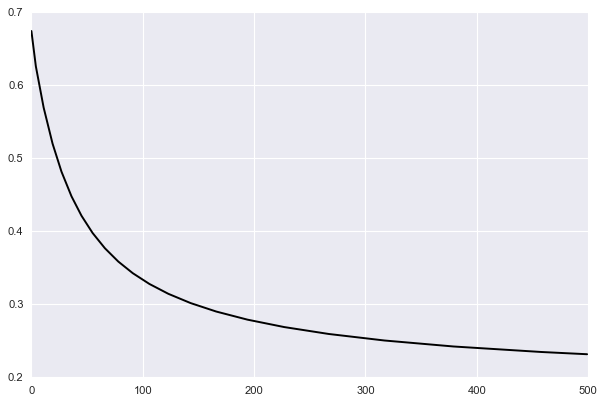

[[0.99847832]
 [8.30130444]
 [7.88013358]]


In [59]:

plt.plot(J_val,color='k')
plt.show()
print(theta)

# seems good :D
## Decision boundary



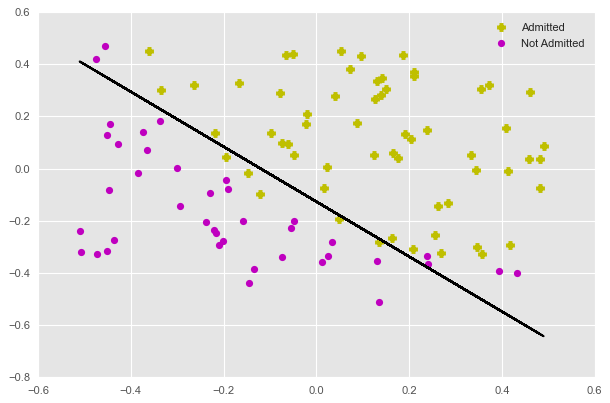

In [60]:
# plt.xticks(np.arange(0, 100, step=10))
style.use("ggplot")
plt.scatter(X[pos_one[:,0],1],X[pos_one[:,0],2],color='y',marker='+',linewidth=8)
plt.scatter(X[pos_zero[:,0],1],X[pos_zero[:,0],2],color='m',marker='o',linewidth=2)
plt.legend(["Admitted","Not Admitted"])

# Theta_1 + Theta_2*x_1 + theta_3*x_2 = 0 is the decision boundary    
x1=X[:,1]
x2=(-theta[0,0]-theta[1,0]*x1)/theta[2,0]
plt.plot(x1,x2,color='k')
plt.show()


In [61]:
def Prediction(theta,X):
    predictions = X.dot(theta)
    
    return predictions>=0
p=Prediction(theta,X)
print("Accuracy:", sum(p==y)[0],"%")

Accuracy: 89 %
